# School Census Analysis

The dataset we will use is from the American Statistical 
Association’s [U.S. Census at School](https://ww2.amstat.org/censusatschool/) project and consists 
of a wide array of questions answered by American school 
students from all states and most grades. A 500-record dataset
has been sampled and downloaded from this project and presented 
as an Excel file at http://bit.ly/2VuOA98

No meta-data are available for this dataset. Fortunately, most of the 
field names are self-explanatory, although there may be a wide 
variation in how individual participants answered the questions.


In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

# Initial Cleaning

Two columns are copied onto a new dataframe from a dataset that was loaded off of the internet. The columns are renamed for better clarity.

In [85]:
df = pd.read_excel("http://bit.ly/2VuOA98")
dfhours.dtypes
dfhours = df[['Watching_TV_Hours', 'Doing_Homework_Hours']]
dfhours.columns = ['tv','homework']

Checks for unique (extreme) values.

In [86]:
print(dfhours.tv.unique())
print(dfhours.homework.unique())

[nan 49 24 20 5 2 0 4 8 3 10 1 6 28 9 12 25 7 0.5 15 30 50 14 100 90 35 45
 11 21 56 26 22 16 42 70 datetime.datetime(2019, 1, 2, 0, 0) 40]
[nan 3 5 20 1 10 7 4 16 15 9 0 8 6 2 44 12 30 21 24 35 19 25 14 18 28 56 11
 32 22 100 26 7.5 48 datetime.datetime(2019, 12, 14, 0, 0) 55 40 60 23 50]


Removes those unique values.

In [87]:
dfhours.tv = pd.to_numeric(dfhours.tv, errors = 'coerce')
dfhours.homework = pd.to_numeric(dfhours.homework, errors = 'coerce')

Checks for correlation between the two columns tv and hw.

In [88]:
dfhours.corr()

,tv,homework
tv,1.000000,0.215891
homework,0.215891,1.000000


No strong correlation, check with histogram and scatter plot to make sure.

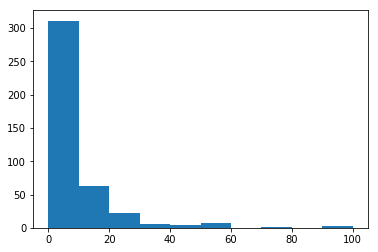

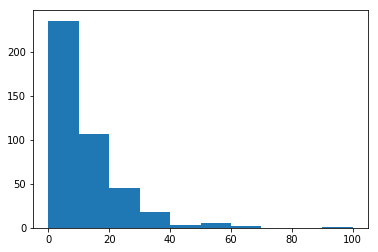

In [89]:
dfhours = dfhours.dropna()
plt.hist(dfhours.tv)
plt.show()
plt.hist(dfhours.homework)
plt.show()

In the histograms above we can see that most values for hours watched on tv are fewer than 20, and fewer than 30 hours for homework. Bet let's get more accurate values for each histogram from the 95th percentile below.

In [90]:
dfhours.describe(percentiles = [0.25, 0.5, 0.95])

,tv,homework
count,416.000000,416.000000
mean,7.612981,10.578125
std,12.264720,11.331395
min,0.000000,0.000000
25%,1.000000,3.000000
50%,4.000000,7.000000
95%,25.750000,30.000000
max,100.000000,100.000000


The following histograms will only include 26 TV hours or less, and 30 hw hours or less. Let's make sure they look reasonable. 

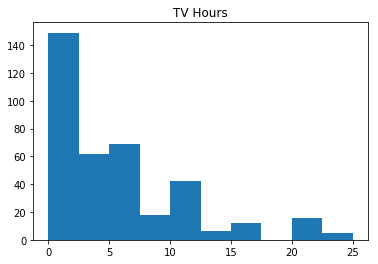

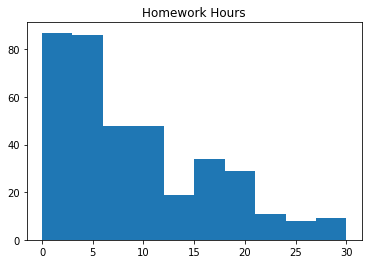

,tv,homework
count,379.000000,379.000000
mean,5.373351,8.679420
std,5.571783,7.302478
min,0.000000,0.000000
25%,1.000000,3.000000
50%,4.000000,6.000000
75%,8.000000,14.000000
max,25.000000,30.000000


In [91]:
dfhours = dfhours[dfhours.tv <= 26]
dfhours = dfhours[dfhours.homework <= 30]
plt.hist(dfhours.tv)
plt.title('TV Hours')
plt.show()
plt.hist(dfhours.homework)
plt.title('Homework Hours')
plt.show()
dfhours.describe()

In [92]:
dfhours.corr()

,tv,homework
tv,1.000000,-0.025822
homework,-0.025822,1.000000


Correlation vitually non-existant. Let's look at scatter plot to check and confirm. Clearly, there is little to no relationship.

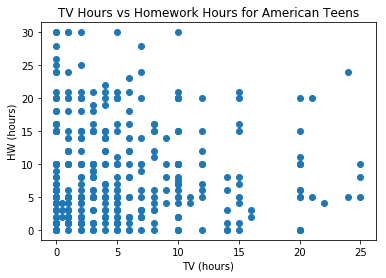

In [93]:
plt.scatter(dfhours.tv, dfhours.homework)
plt.title('TV Hours vs Homework Hours for American Teens')
plt.xlabel('TV (hours)')
plt.ylabel('HW (hours)')
plt.show()

# Statistical Significance

In [94]:
from scipy.stats import pearsonr
pearsonr(dfhours.tv, dfhours.homework)

(-0.025821712302087432, 0.616287961115634)

The null hypothesis is that there is no relationship between tv hours and hw hours

p-value = 0.616 

Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is no relationship, so therefore there is no relationship between hours spent doing homework and hours spent watching tv

# Conclusion

Many people, including me before doing this data analysis, believe that there is a relationship between hours spent watching tv and hours spent watching homework. If a student watches a lot of tv, they probably don't spend that much time doing homework, and vice versa. This analysis of some sample of American high-school students shows that there is no significant relationship between the two, and that my preconceived notion was wrong. 